In [17]:
import pandas as pd
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    MaxAbsScaler,
    OneHotEncoder,
)
from sklearn.feature_extraction import FeatureHasher
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector

In [5]:
playlist_dir = r"/Users/jamesmoro/Documents/Python/playlist-recommender/playlist-creator/data/playlist_df.pkl"
liked_songs_dir = r"/Users/jamesmoro/Documents/Python/playlist-recommender/playlist-creator/data/liked_songs_df.pkl"

In [ ]:
df = pd.read_pickle(playlist_dir)

In [ ]:
df.head()

In [ ]:
useless_cols = ["type", "id", "uri", "track_href", "analysis_url"]
df = df.drop(useless_cols, axis=1)

In [ ]:
cat_features = df.select_dtypes(include=["object"]).columns.to_list()
num_features = [x for x in df.columns if x not in cat_features]

In [ ]:
df_num = df.drop(cat_features, axis=1)
df_cat = df[cat_features]

In [ ]:
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

In [ ]:
df_train_hash = df_cat.copy()
for c in df.columns:
    df_train_hash[c] = df[c].astype("str")

In [ ]:
num_features = (df_train_hash.shape[1]) ** 2
feature_hasher = FeatureHasher(input_type="string", n_features=num_features)
hashed = feature_hasher.transform(df_train_hash.to_dict(orient="records"))

In [ ]:
hashed.shape

In [ ]:
hashed.toarray()

# Pipeline

In [ ]:
df = pd.read_pickle(playlist_dir)
useless_cols = ["type", "id", "uri", "track_href", "analysis_url"]
df = df.drop(useless_cols, axis=1)
X = df.drop("playlist_name", axis=1)
y = df["playlist_name"].values

In [ ]:
cat_features = X.select_dtypes(include=["object"]).columns.to_list()
num_features = [x for x in X.columns if x not in cat_features]

In [ ]:
no_hashing_features = len(cat_features) ** 2

## Testing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [ ]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

# Dict vectorizer

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
df = pd.read_pickle(playlist_dir)
useless_cols = ["type", "id", "uri", "track_href", "analysis_url"]
df = df.drop(useless_cols, axis=1)
X = df.drop("playlist_name", axis=1)
y = df["playlist_name"].values

In [ ]:
cat_features = X.select_dtypes(include=["object"]).columns.to_list()
num_features = [x for x in X.columns if x not in cat_features]

In [ ]:
vec = DictVectorizer()

In [ ]:
vec.fit_transform(X[cat_features].to_dict(orient="records"), y_train)

## pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train.to_dict(orient="records")
X_test = X_test.to_dict(orient="records")

In [ ]:
pipe = Pipeline(
    [
        ("vectorizer", DictVectorizer(sparse=False)),
        ("scaler", MinMaxScaler()),
        ("clf", RandomForestClassifier()),
    ]
)

pipe.fit(X_train, y_train)

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn import metrics

metrics.f1_score(y_test, y_pred, average="micro")

In [ ]:
from sklearn import metrics

metrics.f1_score(y_test, y_pred, average="micro")
metrics.accuracy_score(y_test, y_pred)

# column transformer pipeline

In [68]:
df = pd.read_pickle(playlist_dir)
useless_cols = ["type", "id", "uri", "track_href", "analysis_url", "track_names"]
df = df.drop(useless_cols, axis=1)
X = df.drop("playlist_name", axis=1)
y = df["playlist_name"]

In [70]:
cat_features = X.select_dtypes(include=["object"]).columns.to_list()
num_features = [x for x in X.columns if x not in cat_features]
X[cat_features] = X[cat_features].astype("category")
y = y.astype("category")

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y, shuffle=True
)

In [85]:
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [86]:
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="category")),
        ("cat", categorical_transformer, selector(dtype_include="category")),
    ]
)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())]
)

In [87]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa98ef0f340>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa98ef0eb00>)])),
                ('classifier', RandomForestClassifier())])

In [88]:
y_pred = clf.predict(X_test);

In [89]:
from sklearn import metrics

metrics.f1_score(y_test, y_pred, average="micro")

0.36363636363636365

In [90]:
metrics.accuracy_score(y_test, y_pred)

0.36363636363636365

In [83]:
df["playlist_name"].nunique()

33

Look for how to deal with large number of target classes, and also very skewed data. 

Add labelbinazer for y

# Rebalancing

In [13]:
import imblearn

print(imblearn.__version__)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

0.9.1


In [31]:
df = pd.read_pickle(playlist_dir)
useless_cols = ["type", "id", "uri", "track_href", "analysis_url", "track_names"]
df = df.drop(useless_cols, axis=1)
X = df.drop("playlist_name", axis=1)
y = df["playlist_name"]
cat_features = X.select_dtypes(include=["object"]).columns.to_list()
num_features = [x for x in X.columns if x not in cat_features]
X[cat_features] = X[cat_features].astype("category")
y = y.astype("category")

In [32]:
y = LabelEncoder().fit_transform(y)

Class=32, n=11 (0.455%)
Class=11, n=40 (1.655%)
Class=22, n=31 (1.283%)
Class=9, n=336 (13.902%)
Class=21, n=27 (1.117%)
Class=2, n=115 (4.758%)
Class=0, n=32 (1.324%)
Class=14, n=66 (2.731%)
Class=12, n=21 (0.869%)
Class=16, n=90 (3.724%)
Class=5, n=97 (4.013%)
Class=20, n=35 (1.448%)
Class=24, n=129 (5.337%)
Class=25, n=115 (4.758%)
Class=7, n=73 (3.020%)
Class=30, n=37 (1.531%)
Class=15, n=218 (9.019%)
Class=19, n=12 (0.496%)
Class=13, n=36 (1.489%)
Class=26, n=77 (3.186%)
Class=8, n=59 (2.441%)
Class=17, n=17 (0.703%)
Class=27, n=27 (1.117%)
Class=18, n=7 (0.290%)
Class=23, n=11 (0.455%)
Class=1, n=113 (4.675%)
Class=28, n=42 (1.738%)
Class=6, n=340 (14.067%)
Class=29, n=18 (0.745%)
Class=31, n=73 (3.020%)
Class=10, n=65 (2.689%)
Class=3, n=14 (0.579%)
Class=4, n=33 (1.365%)


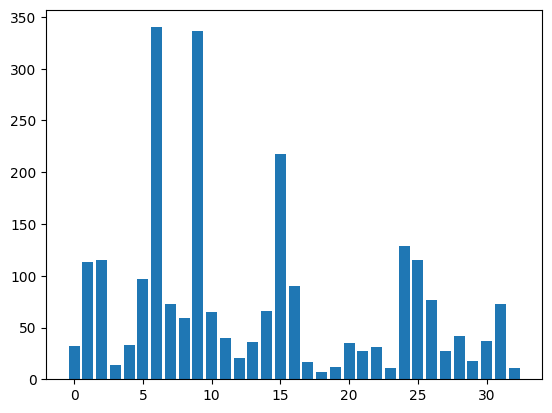

In [33]:
counter = Counter(y)
for k, v in counter.items():
    per = v / len(y) * 100
    print("Class=%d, n=%d (%.3f%%)" % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [34]:
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="category")),
        ("cat", categorical_transformer, selector(dtype_include="category")),
    ]
)
X_transformed = preprocessor.fit_transform(X)

In [36]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_transformed, y)

Class=32, n=340 (3.030%)
Class=11, n=340 (3.030%)
Class=22, n=340 (3.030%)
Class=9, n=340 (3.030%)
Class=21, n=340 (3.030%)
Class=2, n=340 (3.030%)
Class=0, n=340 (3.030%)
Class=14, n=340 (3.030%)
Class=12, n=340 (3.030%)
Class=16, n=340 (3.030%)
Class=5, n=340 (3.030%)
Class=20, n=340 (3.030%)
Class=24, n=340 (3.030%)
Class=25, n=340 (3.030%)
Class=7, n=340 (3.030%)
Class=30, n=340 (3.030%)
Class=15, n=340 (3.030%)
Class=19, n=340 (3.030%)
Class=13, n=340 (3.030%)
Class=26, n=340 (3.030%)
Class=8, n=340 (3.030%)
Class=17, n=340 (3.030%)
Class=27, n=340 (3.030%)
Class=18, n=340 (3.030%)
Class=23, n=340 (3.030%)
Class=1, n=340 (3.030%)
Class=28, n=340 (3.030%)
Class=6, n=340 (3.030%)
Class=29, n=340 (3.030%)
Class=31, n=340 (3.030%)
Class=10, n=340 (3.030%)
Class=3, n=340 (3.030%)
Class=4, n=340 (3.030%)


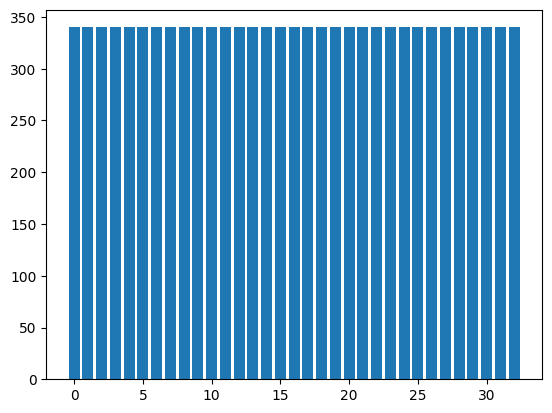

In [37]:
counter = Counter(y)
for k, v in counter.items():
    per = v / len(y) * 100
    print("Class=%d, n=%d (%.3f%%)" % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()